### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
seed = 42
tf.compat.v1.set_random_seed(seed)

TensorFlow 2.x selected.


In [2]:
tf.__version__

'2.0.0'

- Ensuring that Tensorflow 2.0.0 is the version running in this notebook

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
print(testY[0:5])

[9 2 1 1 6]


- Data has been loaded correctly

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [6]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:2])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


In [7]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

label for each of the below image: 9
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 2
label for each of the below image: 7
label for each of the below image: 2
label for each of the below image: 5
label for each of the below image: 5


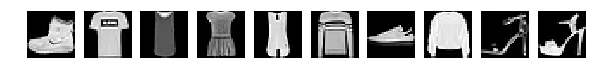

In [8]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(trainX[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(trainY[0:10][i])))
plt.show()


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
#model.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [10]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50,
          batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 27us/sample - loss: 164.5089 - accuracy: 0.1696 - val_loss: 6984.9458 - val_accuracy: 0.1975
Epoch 2/50
60000/60000 [==============================] - 0s 8us/sample - loss: 6954.1870 - accuracy: 0.1982 - val_loss: 11586.7793 - val_accuracy: 0.3287
Epoch 3/50
60000/60000 [==============================] - 0s 7us/sample - loss: 11622.5703 - accuracy: 0.3359 - val_loss: 13518.5713 - val_accuracy: 0.2733
Epoch 4/50
60000/60000 [==============================] - 0s 7us/sample - loss: 13541.5186 - accuracy: 0.2722 - val_loss: 14069.8115 - val_accuracy: 0.2747
Epoch 5/50
60000/60000 [==============================] - 0s 7us/sample - loss: 14032.1650 - accuracy: 0.2766 - val_loss: 16005.6895 - val_accuracy: 0.1651
Epoch 6/50
60000/60000 [==============================] - 0s 7us/sample - loss: 15936.8896 - accuracy: 0.1653 - val_loss: 10311.0557 - val_accuracy: 0.3000
Epoch 7/50
60000/

- The network gives around 68% training accuracy and 66% validation accuracy

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [12]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50,
          batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 26us/sample - loss: 2.7075 - accuracy: 0.1307 - val_loss: 29.4049 - val_accuracy: 0.1855
Epoch 2/50
60000/60000 [==============================] - 1s 15us/sample - loss: 2.4365 - accuracy: 0.1928 - val_loss: 18.1263 - val_accuracy: 0.2078
Epoch 3/50
60000/60000 [==============================] - 1s 15us/sample - loss: 2.2217 - accuracy: 0.2528 - val_loss: 13.0290 - val_accuracy: 0.2278
Epoch 4/50
60000/60000 [==============================] - 1s 15us/sample - loss: 2.0491 - accuracy: 0.3039 - val_loss: 10.0210 - val_accuracy: 0.2511
Epoch 5/50
60000/60000 [==============================] - 1s 15us/sample - loss: 1.9084 - accuracy: 0.3467 - val_loss: 8.0158 - val_accuracy: 0.2682
Epoch 6/50
60000/60000 [==============================] - 1s 15us/sample - loss: 1.7924 - accuracy: 0.3822 - val_loss: 6.5887 - val_accuracy: 0.2849
Epoch 7/50
60000/60000 [============================

- There is no improvement with batch normalization

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
# Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

# Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50,
          batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 24us/sample - loss: 0.8862 - accuracy: 0.6960 - val_loss: 1.1482 - val_accuracy: 0.6609
Epoch 2/50
60000/60000 [==============================] - 1s 15us/sample - loss: 0.8857 - accuracy: 0.6962 - val_loss: 1.1396 - val_accuracy: 0.6613
Epoch 3/50
60000/60000 [==============================] - 1s 15us/sample - loss: 0.8853 - accuracy: 0.6964 - val_loss: 1.1313 - val_accuracy: 0.6623
Epoch 4/50
60000/60000 [==============================] - 1s 15us/sample - loss: 0.8848 - accuracy: 0.6967 - val_loss: 1.1233 - val_accuracy: 0.6630
Epoch 5/50
60000/60000 [==============================] - 1s 14us/sample - loss: 0.8843 - accuracy: 0.6968 - val_loss: 1.1157 - val_accuracy: 0.6639
Epoch 6/50
60000/60000 [==============================] - 1s 15us/sample - loss: 0.8839 - accuracy: 0.6969 - val_loss: 1.1082 - val_accuracy: 0.6645
Epoch 7/50
60000/60000 [==============================] 

- Decreasing the learning rate improves training accuracy but reduces testing accuracy
- This leads to potential overfitting 
- However, only 50 iterations have been tried. Increasing iterations may improve results

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 100 Outputs after applying softmax
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

# Add Dense Layer which provides 100 Outputs after applying softmax
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))


# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

# Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

### Run the model

In [16]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50,
          batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 30us/sample - loss: 2.6457 - accuracy: 0.0946 - val_loss: 2.6353 - val_accuracy: 0.0824
Epoch 2/50
60000/60000 [==============================] - 1s 21us/sample - loss: 2.6222 - accuracy: 0.0940 - val_loss: 2.6124 - val_accuracy: 0.0820
Epoch 3/50
60000/60000 [==============================] - 1s 21us/sample - loss: 2.6002 - accuracy: 0.0933 - val_loss: 2.5908 - val_accuracy: 0.0821
Epoch 4/50
60000/60000 [==============================] - 1s 21us/sample - loss: 2.5794 - accuracy: 0.0926 - val_loss: 2.5705 - val_accuracy: 0.0825
Epoch 5/50
60000/60000 [==============================] - 1s 21us/sample - loss: 2.5598 - accuracy: 0.0918 - val_loss: 2.5514 - val_accuracy: 0.0828
Epoch 6/50
60000/60000 [==============================] - 1s 21us/sample - loss: 2.5414 - accuracy: 0.0912 - val_loss: 2.5334 - val_accuracy: 0.0826
Epoch 7/50
60000/60000 [==============================] 



1.   It is seen that adding 2 additonal layers of 100 neurons does not make any difference to the results
2.   What is interesting is that the results actually becomes bad and the network stops learning

1.   Howevrer, with ReLU activation function and 3 layers, the results improve a lot (shown below)
2.   This suggests that the sigmoid activation function is not learning - it is near its inflection point





In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 100 Outputs after applying softmax
model.add(tf.keras.layers.Dense(100, activation='relu'))

# Add Dense Layer which provides 100 Outputs after applying softmax
model.add(tf.keras.layers.Dense(100, activation='relu'))


# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

# Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50,
          batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 32us/sample - loss: 2.7786 - accuracy: 0.1398 - val_loss: 23.1285 - val_accuracy: 0.1649
Epoch 2/50
60000/60000 [==============================] - 1s 21us/sample - loss: 2.6691 - accuracy: 0.1440 - val_loss: 15.2469 - val_accuracy: 0.1684
Epoch 3/50
60000/60000 [==============================] - 1s 21us/sample - loss: 2.5692 - accuracy: 0.1499 - val_loss: 11.6094 - val_accuracy: 0.1717
Epoch 4/50
60000/60000 [==============================] - 1s 21us/sample - loss: 2.4776 - accuracy: 0.1584 - val_loss: 9.4068 - val_accuracy: 0.1750
Epoch 5/50
60000/60000 [==============================] - 1s 21us/sample - loss: 2.3932 - accuracy: 0.1697 - val_loss: 7.9031 - val_accuracy: 0.1771
Epoch 6/50
60000/60000 [==============================] - 1s 21us/sample - loss: 2.3153 - accuracy: 0.1853 - val_loss: 6.8054 - val_accuracy: 0.1795
Epoch 7/50
60000/60000 [=============================